In [1]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\user\Desktop\spam.csv",encoding = "ISO-8859-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [43]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
#Checking nulls
df.isna().sum()

v1    0
v2    0
dtype: int64

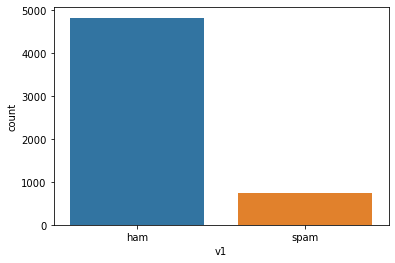

In [45]:
#Countplot for checking number of spam and number of ham mails
sns.countplot(df['v1'])
plt.show()

## Replacing ham by 0 and spam by 1

In [5]:
df['v1']=df['v1'].replace(['ham','spam'],[0,1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Analysing text in v2

In [6]:
#converting all the comments to lower case so thats its easy to analyse them.
df['v2']=df['v2'].str.lower()

In [7]:
#Replacing email address,links, phone numbers, any sort of numbers and currency as they are not abusive
df['v2']=df['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailid')
df['v2']=df['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','link')
df['v2']=df['v2'].str.replace(r'£|\$', 'currency')   
df['v2']=df['v2'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phno')
df['v2']=df['v2'].str.replace(r'\d+(\.\d+)?', 'numbr') 

In [8]:
#Removing punctuations
df['v2']=df['v2'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))


In [9]:
# Removing stop words
sw = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['v2']=df['v2'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in sw))

In [10]:
#word lemmatizer
lm=WordNetLemmatizer()
df['v2']=df['v2'].apply(lambda x: ' '.join(
 lm.lemmatize(t) for t in x.split()))

In [11]:
x=df['v2']

In [12]:
y=df['v1']

In [13]:
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
Vectorizer = CountVectorizer()

In [20]:
count= Vectorizer.fit_transform(X_train.values)

In [21]:
#Creating a object for this called clf
clf=MultinomialNB()
clf.fit(count,y_train.values)
y_pred=clf.predict(Vectorizer.transform(X_test.values))
print(accuracy_score(y_pred,y_test.values))

0.9901345291479821


## Confusion matrix

In [27]:
confusion_matrix (y_test , y_pred)

array([[950,   3],
       [  8, 154]], dtype=int64)

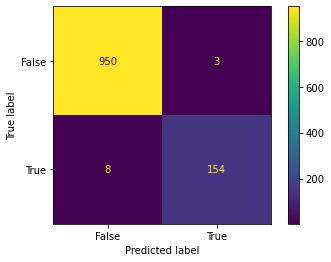

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

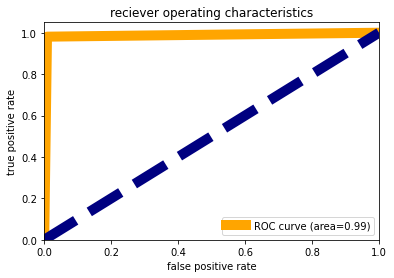

In [30]:
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       953
           1       0.98      0.95      0.97       162

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

